# How the world has changed over the past 200 years?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I chose data available on the Gapminder [website](https://www.gapminder.org/data/) to evaluate how the world has changed in the last 200 years.My main question is: how the world has changed over the past 200 years? While the answer to this question might sound obvious, due to the economic, technological and healthcare advances the world have experienced over the past two centuries, it still interesting to evaluate the magnitude of this change, and how the different regions have changed over the years. 

I selected few key variables to evaluate this issue:

- **PPP GDP**: gross domestic product for each country converted to international dollars using purchasing power parity rates. Data are in constant 2005 international dollars;
- **Income Per Person**: Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 price, PPP based on 2011 ICP;
- **Gini coefficient**: Gini shows income inequality in a society. A higher number means more equality;
- **Population**: total population;
- **Child mortality**: Death of children under five years of age per 1,000 live births;
- **Life expectancy**: The average number of years a newborn child would live if current patterns were to stay the same.

Since these variable are provided for a period of time that spans from 2010 to 2013, I picked two years: 1800 and 2000 as reference.



First of all, I imported the packages I needed for this project.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In this section, I will start by importing the different DataFrames which contains a single variables over time, and print out some general information to familiarize with the data.

In [2]:
tot_gdp = pd.read_csv('total_gdp_ppp_inflation_adjusted.csv')
print(tot_gdp.head())
print(tot_gdp.info())

       country          1800          1801          1802          1803  \
0  Afghanistan  2.080000e+09  2.080000e+09  2.080000e+09  2.080000e+09   
1      Albania  3.260000e+08  3.270000e+08  3.280000e+08  3.300000e+08   
2      Algeria  3.810000e+09  3.820000e+09  3.830000e+09  3.850000e+09   
3      Andorra  3.340000e+06  3.350000e+06  3.360000e+06  3.360000e+06   
4       Angola  1.020000e+09  1.020000e+09  1.030000e+09  1.030000e+09   

           1804          1805          1806          1807          1808  \
0  2.080000e+09  2.080000e+09  2.080000e+09  2.080000e+09  2.080000e+09   
1  3.310000e+08  3.320000e+08  3.340000e+08  3.350000e+08  3.370000e+08   
2  3.860000e+09  3.870000e+09  3.890000e+09  3.900000e+09  3.920000e+09   
3  3.370000e+06  3.370000e+06  3.380000e+06  3.380000e+06  3.390000e+06   
4  1.040000e+09  1.040000e+09  1.050000e+09  1.050000e+09  1.050000e+09   

       ...               2004          2005          2006          2007  \
0      ...       2.890000e+10

In [3]:
gini = pd.read_csv('gini.csv')
print(gini.head())
print(gini.info())

       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...   \
0  Afghanistan  30.5  30.5  30.5  30.5  30.5  30.5  30.5  30.5  30.5  ...    
1      Albania  38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9  ...    
2      Algeria  56.2  56.2  56.2  56.2  56.2  56.2  56.2  56.2  56.2  ...    
3      Andorra  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  ...    
4       Angola  57.2  57.2  57.2  57.2  57.2  57.2  57.2  57.2  57.2  ...    

   2031  2032  2033  2034  2035  2036  2037  2038  2039  2040  
0  36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8  
1  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  
2  27.6  27.6  27.6  27.6  27.6  27.6  27.6  27.6  27.6  27.6  
3  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  
4  42.6  42.6  42.6  42.6  42.6  42.6  42.6  42.6  42.6  42.6  

[5 rows x 242 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 242 entries, country to 2040
dtypes: float

In [4]:
income_per_person = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
print(income_per_person.head())
print(income_per_person.info())

       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...    \
0  Afghanistan   603   603   603   603   603   603   603   603   603  ...     
1      Albania   667   667   667   667   667   668   668   668   668  ...     
2      Algeria   715   716   717   718   719   720   721   722   723  ...     
3      Andorra  1200  1200  1200  1200  1210  1210  1210  1210  1220  ...     
4       Angola   618   620   623   626   628   631   634   637   640  ...     

    2031   2032   2033   2034   2035   2036   2037   2038   2039   2040  
0   2550   2600   2660   2710   2770   2820   2880   2940   3000   3060  
1  19400  19800  20200  20600  21000  21500  21900  22300  22800  23300  
2  14300  14600  14900  15200  15500  15800  16100  16500  16800  17100  
3  73600  75100  76700  78300  79900  81500  83100  84800  86500  88300  
4   6110   6230   6350   6480   6610   6750   6880   7020   7170   7310  

[5 rows x 242 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 ent

In [5]:
child_mortality = pd.read_csv('child_mortality.csv')
print(child_mortality.head())
print(child_mortality.info())

       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  469.0  469.0  469.0  469.0  469.0  469.0  470.0  470.0  470.0   
1      Albania  375.0  375.0  375.0  375.0  375.0  375.0  375.0  375.0  375.0   
2      Algeria  460.0  460.0  460.0  460.0  460.0  460.0  460.0  460.0  460.0   
3      Andorra    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4       Angola  486.0  486.0  486.0  486.0  486.0  486.0  486.0  486.0  486.0   

   ...     2091   2092   2093   2094   2095   2096   2097   2098   2099   2100  
0  ...    12.60  12.40  12.20  12.00  11.80  11.60  11.50  11.30  11.10  11.10  
1  ...     2.32   2.30   2.27   2.24   2.22   2.19   2.16   2.14   2.11   2.11  
2  ...     4.28   4.20   4.14   4.07   4.00   3.94   3.88   3.82   3.76   3.76  
3  ...     0.86   0.84   0.83   0.81   0.80   0.79   0.78   0.77   0.76   0.76  
4  ...    17.70  17.50  17.30  17.10  17.00  16.80  16.60  16.40  16.30  16.30  

[5 rows x 302 columns]
<cl

In [6]:
population = pd.read_csv('population_total.csv')
print(population.head())
print(population.info())

       country     1800     1801     1802     1803     1804     1805     1806  \
0  Afghanistan  3280000  3280000  3280000  3280000  3280000  3280000  3280000   
1      Albania   400000   402000   404000   405000   407000   409000   411000   
2      Algeria  2500000  2510000  2520000  2530000  2540000  2550000  2560000   
3      Andorra     2650     2650     2650     2650     2650     2650     2650   
4       Angola  1570000  1570000  1570000  1570000  1570000  1570000  1570000   

      1807     1808    ...           2091       2092       2093       2094  \
0  3280000  3280000    ...       76600000   76400000   76300000   76100000   
1   413000   414000    ...        1330000    1300000    1270000    1250000   
2  2560000  2570000    ...       70400000   70500000   70500000   70600000   
3     2650     2650    ...          63000      62900      62900      62800   
4  1570000  1570000    ...      168000000  170000000  172000000  175000000   

        2095       2096       2097       209

In [7]:
life_expectancy = pd.read_csv('life_expectancy.csv')
print(life_expectancy.head())
print(population.info())

       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...   \
0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...    
1      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...    
2      Algeria  28.8  28.8  28.8  28.8  28.8  28.8  28.8  28.8  28.8  ...    
3      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
4       Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...    

   2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  76.5  76.6  76.7  76.9  77.0  77.1  77.3  77.4  77.5  77.7  
1  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.1  88.2  88.3  
2  88.3  88.4  88.5  88.6  88.7  88.8  88.9  89.0  89.1  89.2  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  78.7  78.9  79.0  79.1  79.3  79.4  79.5  79.7  79.8  79.9  

[5 rows x 302 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: int64

In [8]:
# Use shape method to evaluate the number of rows and columns contained in each DataFrame.
print(tot_gdp.shape)
print(gini.shape)
print(income_per_person.shape)
print(child_mortality.shape)
print(population.shape)
print(life_expectancy.shape)

(194, 215)
(195, 242)
(193, 242)
(195, 302)
(195, 302)
(187, 302)


From above we can notice that all the data starts from the year 1800. However, while the tot_gdp dataframe contains entries until 2013, two dataframes, (`gini` and `income_per_person`) contain projections until the year 2040, and the last three (`child_mortality`,`population` and `life expectancy`) until the year 2100. For the purpose of this project, which is to investigate how the world has changed in the last 200 years, we just need two years: `1800` and `2000`. I dealt with this issue in the following section. 

The DataFrames contain a similar number of rows, which vary by less then 10 entries. This makes it easier to merge it later in a single DataFrame. 

Let's now check how many null values and duplicates are present in the various DataFrames.

In [9]:
#Check null values
print(tot_gdp.isnull().sum().sum())
print(gini.isnull().sum().sum())
print(income_per_person.isnull().sum().sum())
print(child_mortality.isnull().sum().sum())
print(population.isnull().sum().sum())
print(life_expectancy.isnull().sum().sum())

42
0
0
1650
0
759


As we can see, only the `tot_gdp`, `child_mortality` and `life_expectancy` dataframes contains null values. In the next section, we will proceed identifying which values are missing, and how we should deal with them.


In [10]:
#Check if DataFrames contain duplicated values
print(tot_gdp.duplicated().sum())
print(gini.duplicated().sum())
print(income_per_person.duplicated().sum())
print(child_mortality.duplicated().sum())
print(population.duplicated().sum())
print(life_expectancy.duplicated().sum())

0
0
0
0
0
0


Since there are not duplicated columns in our DataFrames, we don't have to worry about them.

### Data Cleaning (reshaping data, merging DataFrames)

In this section I cleaned and reshaped the data and merged the various DataFrames in a single Dataframe. 

The first thing I did is to use the melt function to reshape our data to have all years under a single column called `year`, and the single variable under another column.

In [11]:
tot_gdp = tot_gdp.melt(id_vars=["country"], var_name="year", value_name="gdp")

tot_gdp.head()

,country,year,gdp
0,Afghanistan,1800,2.080000e+09
1,Albania,1800,3.260000e+08
2,Algeria,1800,3.810000e+09
3,Andorra,1800,3.340000e+06
4,Angola,1800,1.020000e+09


In [12]:
income_per_person = income_per_person.melt(id_vars=["country"], var_name="year", value_name="income_per_person")

income_per_person.head()

,country,year,income_per_person
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618


In [13]:
gini = gini.melt(id_vars=["country"], var_name="year", value_name="gini")

gini.head()

,country,year,gini
0,Afghanistan,1800,30.5
1,Albania,1800,38.9
2,Algeria,1800,56.2
3,Andorra,1800,40.0
4,Angola,1800,57.2


In [14]:
child_mortality = child_mortality.melt(id_vars=["country"], var_name="year", value_name="child_mortality")

child_mortality.head()

,country,year,child_mortality
0,Afghanistan,1800,469.0
1,Albania,1800,375.0
2,Algeria,1800,460.0
3,Andorra,1800,NaN
4,Angola,1800,486.0


In [15]:
population = population.melt(id_vars=["country"], var_name="year", value_name="population")

population.head()

,country,year,population
0,Afghanistan,1800,3280000
1,Albania,1800,400000
2,Algeria,1800,2500000
3,Andorra,1800,2650
4,Angola,1800,1570000


In [16]:
life_expectancy = life_expectancy.melt(id_vars=["country"], var_name="year", value_name="life_expectancy")

life_expectancy.head()

,country,year,life_expectancy
0,Afghanistan,1800,28.2
1,Albania,1800,35.4
2,Algeria,1800,28.8
3,Andorra,1800,NaN
4,Angola,1800,27.0


To map each region with the respective countries, I converted the region excel file available on the [gapminder website](https://www.gapminder.org/fw/four-regions/) to a csv_file, and imported here.

In [17]:
regions = pd.read_csv('regions.csv')
regions.head()
regions.rename(columns={"name":"country","four_regions":"region"},inplace=True)
print(regions.head())

       country  region
0  Afghanistan    asia
1      Albania  europe
2      Algeria  africa
3      Andorra  europe
4       Angola  africa


Now I will combine the single Dataframes into a single one, using the merge function on the `country` and `year` columns.

In [18]:
first_merge = pd.merge(tot_gdp, income_per_person, on=('country','year'))
second_merge = pd.merge(gini, regions, on='country')
third_merge = pd.merge(child_mortality,population, on = ('country','year'))
fourth_merge = pd.merge(third_merge,life_expectancy,on = ('country','year'))
fifth_merge = pd.merge(first_merge,second_merge, on = ('country','year'))
gapminder = pd.merge(fifth_merge,fourth_merge, on = ('country','year'))

Let's now use `describe.()` to print out some general statistics about our data. 

In [19]:
print(gapminder.describe())

                gdp  income_per_person          gini  child_mortality  \
count  3.977800e+04       39804.000000  39804.000000     39354.000000   
mean   7.864310e+10        4376.896342     40.109079       295.757032   
std    5.026841e+11        9857.007981      9.146369       158.662528   
min    3.260000e+06         245.000000     16.000000         2.340000   
25%    4.910000e+08         844.000000     34.100000       154.000000   
50%    2.660000e+09        1475.000000     40.000000       361.000000   
75%    1.790000e+10        3380.000000     45.000000       421.000000   
max    1.640000e+13      179000.000000     79.900000       756.000000   

         population  life_expectancy  
count  3.980400e+04     39294.000000  
mean   1.320603e+07        42.439170  
std    6.349871e+07        15.884172  
min    2.260000e+03         1.010000  
25%    3.530000e+05        31.100000  
50%    1.900000e+06        35.200000  
75%    6.210000e+06        54.000000  
max    1.390000e+09        83.

These statistics are not particularly useful, since they are based on an aggregate of countries over 200 years of data. However, we can notice few interesting aspects, such as the fact that the `life_expectancy``min` value is 1, most probably an error in the data, and the `child_mortality max` is 756. This mean that there is a country which, in a single year had 76% of children died under 5 years old.

In [20]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39804 entries, 0 to 39803
Data columns (total 9 columns):
country              39804 non-null object
year                 39804 non-null object
gdp                  39778 non-null float64
income_per_person    39804 non-null int64
gini                 39804 non-null float64
region               39804 non-null object
child_mortality      39354 non-null float64
population           39804 non-null int64
life_expectancy      39294 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.0+ MB


From the `.info()` method used above, we can notice that the DataFrame contains some null values. Let's investigate more this issue.

In [21]:
gapminder.isna().sum()

country                0
year                   0
gdp                   26
income_per_person      0
gini                   0
region                 0
child_mortality      450
population             0
life_expectancy      510
dtype: int64

The `gdp`, `child_mortality` and `life_expectancy` columns contains some missing data. Are these missing values important? We can answer this question by subsetting the DataFrames where the variables are null.

In [22]:
gapminder[gapminder['gdp'].isnull()]

,country,year,gdp,income_per_person,gini,region,child_mortality,population,life_expectancy
83,Japan,1800,NaN,1010,46.8,asia,363.00,28000000,36.4
269,Japan,1801,NaN,1010,46.8,asia,363.00,28100000,36.4
455,Japan,1802,NaN,1010,46.8,asia,363.00,28300000,36.4
641,Japan,1803,NaN,1010,46.8,asia,363.00,28400000,36.4
827,Japan,1804,NaN,1010,46.8,asia,363.00,28600000,36.4
1013,Japan,1805,NaN,1020,46.8,asia,363.00,28700000,36.4
1199,Japan,1806,NaN,1020,46.8,asia,363.00,28900000,36.4
1385,Japan,1807,NaN,1020,46.8,asia,363.00,29000000,36.4
1571,Japan,1808,NaN,1020,46.8,asia,363.00,29200000,36.4
1757,Japan,1809,NaN,1020,46.8,asia,363.00,29300000,36.4


The `gdp` values are missing only for Japan from 1800 to 1819, Andorra from 2012 to 2013, Cuba 2013, North Korea 2013, Palestine 2013 and Syria 2013.

In [23]:
gapminder[gapminder['child_mortality'].isnull()]

,country,year,gdp,income_per_person,gini,region,child_mortality,population,life_expectancy
3,Andorra,1800,3340000.0,1200,40.0,europe,NaN,2650,NaN
48,Dominica,1800,13300000.0,663,40.0,americas,NaN,20000,NaN
104,Marshall Islands,1800,3260000.0,539,40.0,asia,NaN,5830,NaN
189,Andorra,1801,3350000.0,1200,40.0,europe,NaN,2650,NaN
234,Dominica,1801,13300000.0,663,40.0,americas,NaN,20000,NaN
290,Marshall Islands,1801,3270000.0,539,40.0,asia,NaN,5830,NaN
375,Andorra,1802,3360000.0,1200,40.0,europe,NaN,2650,NaN
420,Dominica,1802,13300000.0,663,40.0,americas,NaN,20000,NaN
476,Marshall Islands,1802,3270000.0,540,40.0,asia,NaN,5830,NaN
561,Andorra,1803,3360000.0,1200,40.0,europe,NaN,2650,NaN


In [24]:
gapminder[gapminder['life_expectancy'].isnull()]

,country,year,gdp,income_per_person,gini,region,child_mortality,population,life_expectancy
3,Andorra,1800,3340000.0,1200,40.0,europe,NaN,2650,NaN
48,Dominica,1800,13300000.0,663,40.0,americas,NaN,20000,NaN
104,Marshall Islands,1800,3260000.0,539,40.0,asia,NaN,5830,NaN
189,Andorra,1801,3350000.0,1200,40.0,europe,NaN,2650,NaN
234,Dominica,1801,13300000.0,663,40.0,americas,NaN,20000,NaN
290,Marshall Islands,1801,3270000.0,539,40.0,asia,NaN,5830,NaN
375,Andorra,1802,3360000.0,1200,40.0,europe,NaN,2650,NaN
420,Dominica,1802,13300000.0,663,40.0,americas,NaN,20000,NaN
476,Marshall Islands,1802,3270000.0,540,40.0,asia,NaN,5830,NaN
561,Andorra,1803,3360000.0,1200,40.0,europe,NaN,2650,NaN


For the two other variables (`child_mortality` and `life_expectancy`), the missing values regards only three countries: Andorra, Dominica and Marshall Island. 

Since these null values are not not particularly relevant for our research, we will drop the rows containing them using the `drop.na()` method.

In [25]:
gapminder = gapminder.dropna()

In [26]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39268 entries, 0 to 39803
Data columns (total 9 columns):
country              39268 non-null object
year                 39268 non-null object
gdp                  39268 non-null float64
income_per_person    39268 non-null int64
gini                 39268 non-null float64
region               39268 non-null object
child_mortality      39268 non-null float64
population           39268 non-null int64
life_expectancy      39268 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.0+ MB


Before moving on to the visualization of the Data, I set two indexes on the DataFrame: `region` and `country`. This makes it easier to subset the Dataframe later.

In [27]:
gapminder = gapminder.set_index(['region','country'])

Let's see how the DataFrame looks like with the new indexes.

In [28]:
gapminder.sort_index(level=["region","country"]).query('year == "2000"').head()

year           gdp  income_per_person  gini  \
region country                                                     
africa Algeria       2000  3.090000e+11              10300  33.1   
       Angola        2000  4.650000e+10               3890  51.8   
       Benin         2000  9.670000e+09               1670  39.1   
       Botswana      2000  1.820000e+10              10700  63.4   
       Burkina Faso  2000  1.370000e+10               1080  47.3   

                     child_mortality  population  life_expectancy  
region country                                                     
africa Algeria                  39.7    31000000             74.0  
       Angola                  206.0    16400000             51.7  
       Benin                   139.0     6870000             57.5  
       Botswana                 86.9     1640000             54.0  
       Burkina Faso            179.0    11600000             52.4

<a id='eda'></a>
## Exploratory Data Analysis

After cleaning the data, we can finally start doing some data analysis exploration. As stated in the introduction, in my research project I used as reference the years `1800` and `2000`. As independent variable, I used while`income_per_person`, while `gdp`,`gini`,`life_expectancy` and `child_mortality` as dependent variables. 

First, let's compute some statistics and create visualizations on the single variables. 

### Research Question 1 (Evolution  of the single indicators over time)

First I created a mask with a subset of the gapminder Dataframe for the year 1800 and 2000.

In [29]:

gapminder_1800 = gapminder[gapminder['year'] == "1800"]

gapminder_2000 = gapminder[gapminder['year'] == "2000"]


Now, let's start by displaying a histogram of the income per person indicator.

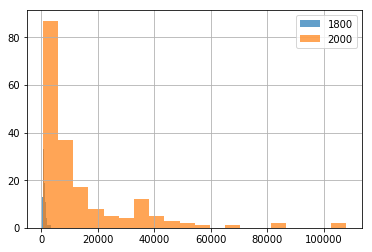

In [30]:
gapminder_1800['income_per_person'].hist(bins=20,alpha=0.7,label = '1800')
gapminder_2000['income_per_person'].hist(bins=20,alpha=0.7,label = '2000')
plt.legend()

As expected, we can notice that income per person has growth dramatically over 200 years. However, the majority of country stills have an income per person lower than 20,000 dollars. Only few countries have an income higher than 40,000 dollars.

Let's now us a plot bar to evaluate how income per person is distributed among different regions, and if the distribution changed over 200 years.

AxesSubplot(0.125,0.125;0.775x0.755)


The world mean income per person in 1800 was 978.741758242 dollars.


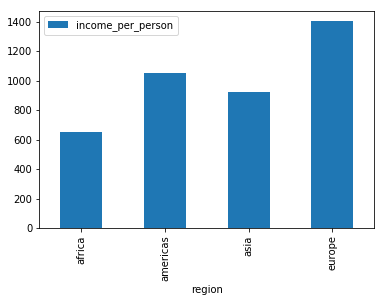

In [31]:
income_per_region_1800 = gapminder_1800.pivot_table( "income_per_person", index="region").plot(kind='bar')
print(income_per_region_1800)
print('\n')
print("The world mean income per person in 1800 was " + str(gapminder_1800['income_per_person'].mean())+" dollars.")

AxesSubplot(0.125,0.125;0.775x0.755)


The world mean income per person in 2000 was 13809.672043 dollars.


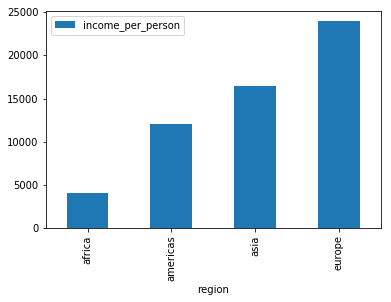

In [32]:
income_per_region_2000 = gapminder_2000.pivot_table( "income_per_person", index="region").plot(kind='bar')
print(income_per_region_2000)
print('\n')
print("The world mean income per person in 2000 was " + str(gapminder_2000['income_per_person'].mean())+" dollars.")

We can notice that income per person has grown dramatically between 1800 and 2000. Globally it increased more than 10x, and regionally even 18x or 20x such as in Asia and Europe.  Europe on average had the highest income per person in 1800 and still maintains this position in 2000. Americas and Asia were respectively second and third in 1800, and third and second in 2000. Africa was the region with the lowest income per person in 1800 and it was still the lowest in 2000.


Let's now move to see how GDP has changed over 200 years.

__Total GDP__

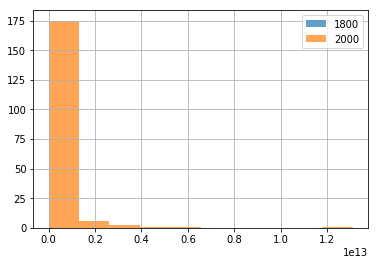

In [33]:
gapminder_1800['gdp'].hist(alpha=0.7,label = '1800')
gapminder_2000['gdp'].hist(alpha=0.7,label = '2000')
plt.legend()

AxesSubplot(0.125,0.125;0.775x0.755)


The global average gdp in 1800 was 5270646538.46 dollars.


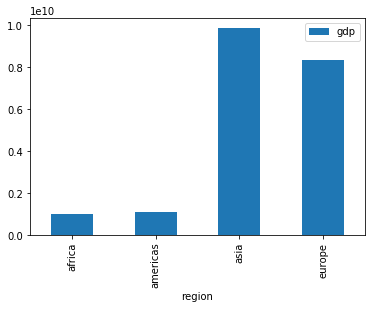

In [34]:
gdp_1800 = gapminder_1800.pivot_table( "gdp", index="region").plot(kind='bar')
print(gdp_1800)
print('\n')
print("The global average gdp in 1800 was " + str(gapminder_1800['gdp'].mean()) + " dollars.")

AxesSubplot(0.125,0.125;0.775x0.755)
The global average gdp in 2000 was 329657107527.0 dollars.


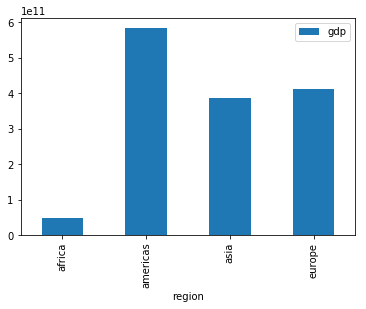

In [35]:
gdp_2000 = gapminder_2000.pivot_table( "gdp", index="region").plot(kind='bar')
print(gdp_2000)
print("The global average gdp in 2000 was " + str(gapminder_2000['gdp'].mean()) + " dollars.")

In [36]:
difference_gdp = ((gapminder_2000['gdp'].mean() - gapminder_1800['gdp'].mean())/gapminder_1800['gdp'].mean() * 100)
print(difference_gdp)

6154.58575378


We can see that GDP has increased dramatically worldwide, from an average of 5,270,646,538.46 dollars in 1800 to 329,657,107,527 dollars in 2000. This accounts for an impressive change of 6154.6 %.
We can see also that Asia was the region with the highest average gdp in 1800, followed by Europe. In 2000 this changed dramatically, with Americas taking the lead, followed by Europe and Asia. Africa remained the poorest region in the world and the average GDP there has grown far lower. 

__Gini coefficient__

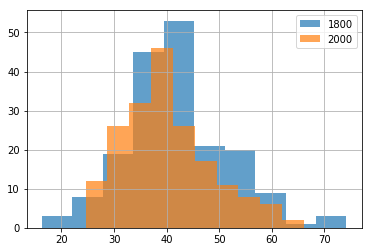

In [37]:
gapminder_1800['gini'].hist(label='1800',alpha=0.7)
gapminder_2000['gini'].hist(label='2000',alpha=0.7)
plt.legend()

AxesSubplot(0.125,0.125;0.775x0.755)


The global average gini in 1800 was 41.5285714286.


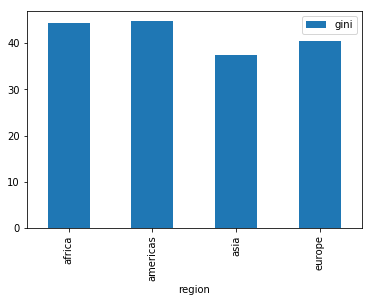

In [38]:
gini_1800 = gapminder_1800.pivot_table( "gini", index="region").plot(kind='bar')
print(gini_1800)
print('\n')
print("The global average gini in 1800 was " + str(gapminder_1800['gini'].mean()) + ".")

AxesSubplot(0.125,0.125;0.775x0.755)


The global average gini in 2000 was 40.2112903226.


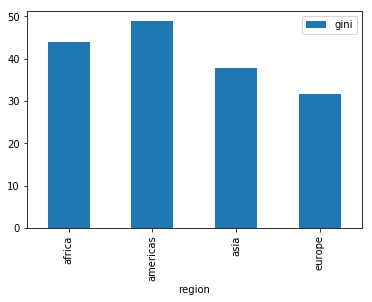

In [39]:
gini_2000 = gapminder_2000.pivot_table( "gini", index="region").plot(kind='bar')
print(gini_2000)
print('\n')
print("The global average gini in 2000 was " + str(gapminder_2000['gini'].mean()) + ".")

In terms of gini coefficient, we can notice from the histogram above that the world has become less inequal that it was 200 years ago. The global average gini in 1800 was 41.5, and 40.2 in 2000. In terms of regions, we can notice that Asia was the less inequal region in the world in 1800, followed by Europe. In 2000, Europe became the less inequal region in the world, with a Gini coefficient of around 30, followed by Asia. 

The two regions with the highest levels of inequality were Africa and Americas both in 1800 and 2000.

__Child Mortality__

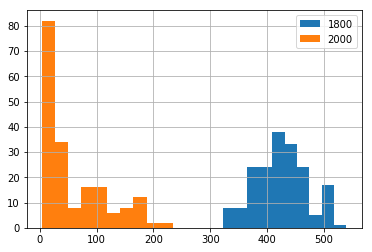

In [40]:
gapminder_1800['child_mortality'].hist(label='1800')
gapminder_2000['child_mortality'].hist(label='2000')
plt.legend()

AxesSubplot(0.125,0.125;0.775x0.755)


The global average child mortality rate in 1800 was 425.032967033.


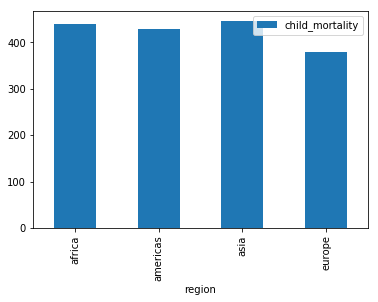

In [41]:
child_mortality_1800 = gapminder_1800.pivot_table( "child_mortality", index="region").plot(kind='bar')
print(child_mortality_1800)
print('\n')
print("The global average child mortality rate in 1800 was " + str(gapminder_1800['child_mortality'].mean()) + ".")

AxesSubplot(0.125,0.125;0.775x0.755)


The global average child mortality rate in 2000 was 57.9322043011.


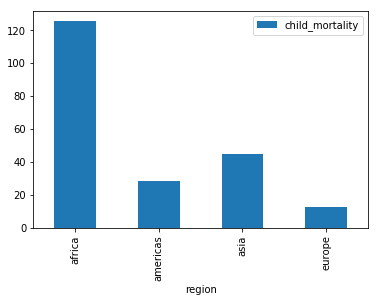

In [42]:
child_mortality_2000 = gapminder_2000.pivot_table( "child_mortality", index="region").plot(kind='bar')
print(child_mortality_2000)
print('\n')
print("The global average child mortality rate in 2000 was " + str(gapminder_2000['child_mortality'].mean()) + ".")

Child mortality has dramatically decreased from 1800 to 2000 due to advancement in medicine, sanity and diet. Interesting is to note that in 1800 the child mortality rate were very high everywhere in the world, while in 2000, the only region with high child mortality rate is Africa.

__Population__

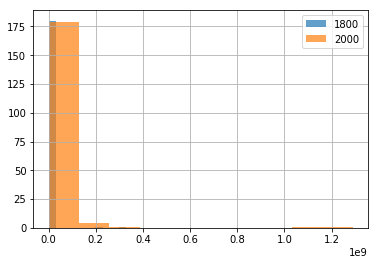

In [43]:
gapminder_1800['population'].hist(label='1800',alpha=0.7)
gapminder_2000['population'].hist(label='2000',alpha=0.7)
plt.legend()

AxesSubplot(0.125,0.125;0.775x0.755)


The global population 1800 was 953988760.


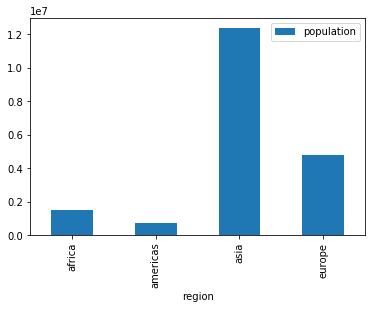

In [44]:
population_1800 = gapminder_1800.pivot_table( "population", index="region").plot(kind='bar')
print(population_1800)
print('\n')
print("The global population 1800 was " + str(gapminder_1800['population'].sum()) + ".")

AxesSubplot(0.125,0.125;0.775x0.755)


The global population in 2000 was 6108355300.


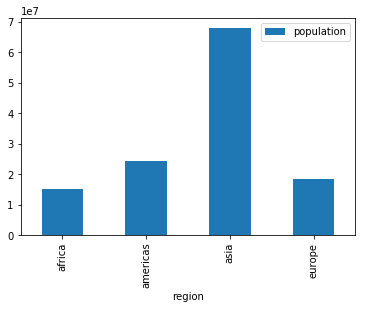

In [45]:
population_2000 = gapminder_2000.pivot_table( "population", index="region").plot(kind='bar')
print(population_2000)
print('\n')
print("The global population in 2000 was " + str(gapminder_2000['population'].sum()) + ".")

In [46]:
difference_population = ((gapminder_2000['population'].sum() - gapminder_1800['population'].sum()) / gapminder_1800['population'].sum())
print(difference_population)

5.40296359467


It does not come to surprise that the population has dramatically increased over the past 200 years. While in 1800 there were 953,988,760 people in the world, in 2000 there were over 6,108,355,300, for an increase of over 540%!!

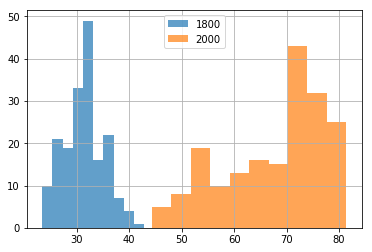

In [47]:
#Life expectancy distribution
gapminder_1800['life_expectancy'].hist(label='1800',alpha=0.7)
gapminder_2000['life_expectancy'].hist(label='2000',alpha=0.7)
plt.legend()

AxesSubplot(0.125,0.125;0.775x0.755)


The life expectancy in 1800 was 31.4505494505 years.


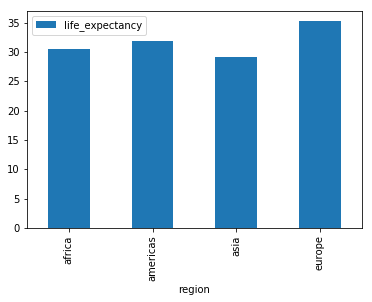

In [48]:
life_expectancy_1800 = gapminder_1800.pivot_table( "life_expectancy", index="region").plot(kind='bar')
print(life_expectancy_1800)
print('\n')
print("The life expectancy in 1800 was " + str(gapminder_1800['life_expectancy'].mean()) + " years.")

AxesSubplot(0.125,0.125;0.775x0.755)


The life expectancy in 2000 was 67.4516129032 years.


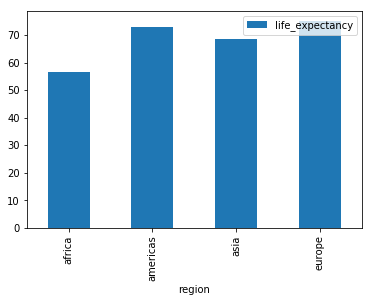

In [49]:
life_expectancy_2000 = gapminder_2000.pivot_table( "life_expectancy", index="region").plot(kind='bar')
print(life_expectancy_2000)
print('\n')
print("The life expectancy in 2000 was " + str(gapminder_2000['life_expectancy'].mean()) + " years.")

Life expectancy more than doubled from 1800 and 2000, passing from 31.5 years to 67 years. This is easily explanable by the improvement in sanitation and healthcare. In terms of regions, in 1800 Europe had the highest mean life expectancy, and it is still at the first place in 2000. Interesting to note that while in 1800 the difference among regions was not that pronunced, in 2000, it varies way more, with a max of Europe (~75 years), a min in Africa (~55 years).

### Research Question 2  (correlation income_per_person vs other indicators)

After exploring the single variables, I will now use `income_per_person` as indipendent variable to see if there is a correlation between it and the other variables. Most economists agrees that GDP and GDP/person are the best indicators to measure the prosperity of a country. However, I think that GDP/person is a better indicator of prosperity than GDP, considering that there are many countries which have a high total GDP while retaining high levels of poverty.


__Gini vs. Income Per Person__

Text(0,0.5,'Income Per Person')

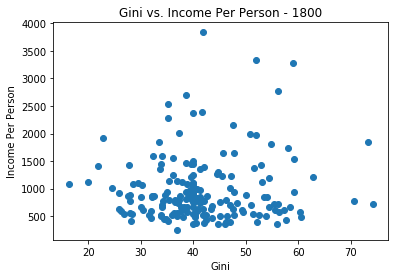

In [50]:
plt.scatter(gapminder_1800['gini'],gapminder_1800['income_per_person'])
plt.title('Gini vs. Income Per Person - 1800')
plt.xlabel('Gini')
plt.ylabel('Income Per Person')

It seems there's wasn't clear correlation between Gini coefficient and Income Per Person in 1800. This means that equal societies were not necessary those which higher income per capita. Let's see if we notice a clearer correlation after 200 years.

Text(0,0.5,'Income Per Person')

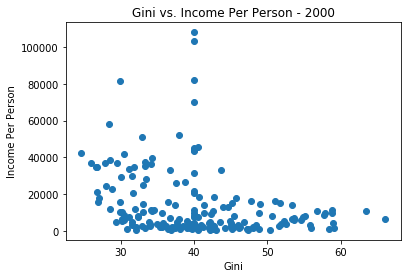

In [51]:
plt.scatter(gapminder_2000['gini'],gapminder_2000['income_per_person'])
plt.title('Gini vs. Income Per Person - 2000')
plt.xlabel('Gini')
plt.ylabel('Income Per Person')

Even in 2000, there wasn't a clear correlation betweeen Gini and Income per Person.

__GDP vs. Income Per Person__

Text(0,0.5,'Income Per Person')

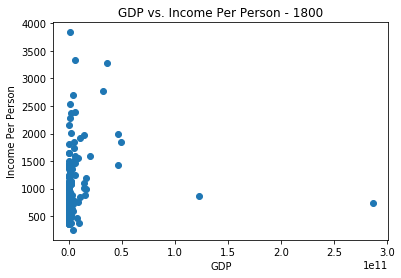

In [52]:
plt.scatter(gapminder_1800['gdp'],gapminder_1800['income_per_person'])
plt.title('GDP vs. Income Per Person - 1800')
plt.xlabel('GDP')
plt.ylabel('Income Per Person')

Text(0,0.5,'Income Per Person')

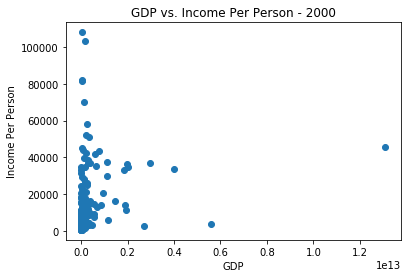

In [53]:
plt.scatter(gapminder_2000['gdp'],gapminder_2000['income_per_person'])
plt.title('GDP vs. Income Per Person - 2000')
plt.xlabel('GDP')
plt.ylabel('Income Per Person')

There is not clear correlation between GDP and Income Per Person neither in 1800 nor in 2000.

__Life Expectancy vs Income Per Person__

Text(0,0.5,'Income Per Person')

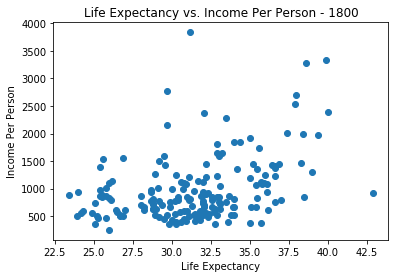

In [54]:
plt.scatter(gapminder_1800['life_expectancy'],gapminder_1800['income_per_person'])
plt.title('Life Expectancy vs. Income Per Person - 1800')
plt.xlabel('Life Expectancy')
plt.ylabel('Income Per Person')

We can notice a positive correlation between Life Expectancy and Income Per Person in 1800. With an increase of income, people tended to live longer. Is it the case also 200 years later?

Text(0,0.5,'Income Per Person')

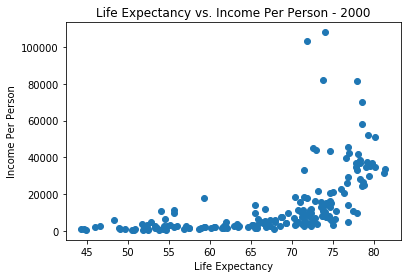

In [55]:
plt.scatter(gapminder_2000['life_expectancy'],gapminder_2000['income_per_person'])
plt.title('Life Expectancy vs. Income Per Person - 2000')
plt.xlabel('Life Expectancy')
plt.ylabel('Income Per Person')

Even in 2000, we can notice a positive correlation between these two variables. Most countries with less than 20,000 dollars of average income, lived between 45 to 70 years. From 70 years on, the correlation is more pronunced, with people with higher income living longer.

__Child Mortality vs Income per Person__

Text(0,0.5,'Income Per Person')

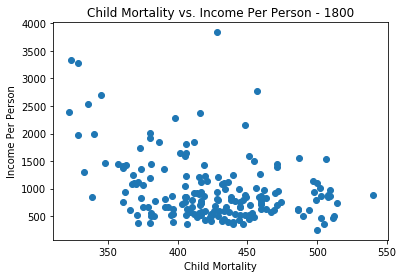

In [56]:
plt.scatter(gapminder_1800['child_mortality'],gapminder_1800['income_per_person'])
plt.title('Child Mortality vs. Income Per Person - 1800')
plt.xlabel('Child Mortality')
plt.ylabel('Income Per Person')

Text(0,0.5,'Income Per Person')

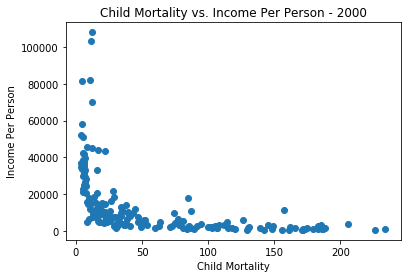

In [57]:
plt.scatter(gapminder_2000['child_mortality'],gapminder_2000['income_per_person'])
plt.title('Child Mortality vs. Income Per Person - 2000')
plt.xlabel('Child Mortality')
plt.ylabel('Income Per Person')

From above we can notice an interesting difference between 1800 and 2000. While in 1800 there wasn't really a clear correlation between child mortality and income per person, in 2000 we can notice a clear negative correlation. Countries with higher income per person tended to have lower child mortality.

<a id='conclusions'></a>
## Conclusions

This project shows how the world has evolved over 200 years, from 1800 to 2000. The statistical analysis and visualization shows that the world has become a more prosperous place, with less child mortality rate and higher life expectancy. We also noted that while differences between regions where not that pronounced in 1800, in 2000 this became much more evident. Europe, in 2000, seemed to be the most prosperous region in the world, with the highest income per person, lowest child mortality and longest life expectancy. In terms of GDP, while in 1800 Asia was the richest region of the world, in 2000 it left the first place to Americas. This is mostly due to the incredible wealth that the United States has. 

In terms of correlation between the our independent variable, income per person, and the dependent variables, we can notice a clear correlation only in terms of life expectancy and mortality rates. Countries with higher income per capita tends to have, respectively, higher life expectancy and lower mortality rate. This trend is particularly evident when we used 2000 as base year, while in 1800 the difference was not that noticeble.


The main limitation of this project is that we considered only two point of time, 1800 and 2000, and evaluated the trends on a regional level, not country based. If we focused on single countries, the results may have different considerabily. Moreover, although I think that the indicators I selected well represent the prosperity of a country, there might be other relevant variables which I did not take into consideration.